# Sklearn

## sklearn.linear_model

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics, model_selection

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [5]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

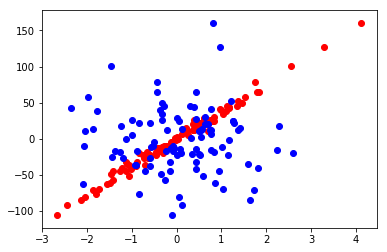

In [7]:
pylab.scatter(list(map(lambda x:x[0], data)), target, color = 'r')
pylab.scatter(list(map(lambda x:x[1], data)), target, color = 'b')

In [8]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [9]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [10]:
print( test_labels)

[  24.47584129   12.47089016  -10.29545833  -71.3715844   -76.75213382
   11.74073026  -27.02798161  -13.99339669   28.15553021  101.14760598
   27.83791274   -4.38652971    4.45578287   12.74038341   11.06961035
   25.24428409   17.64282734   41.1068411    44.41658249  -22.33224966
   45.05465366  -37.31870104  -44.51417742   12.42286854   64.19559505
   13.31981235   -1.42235396   22.2276832   -12.98848753  -18.57607726]


In [11]:
print (predictions)

[ 22.40714982  19.21214455 -11.62314934 -72.03607205 -69.67650242
  13.45160722 -25.5678271  -15.53726541  22.0231255   96.22938788
  22.43348535  -5.43700298   8.64850103   6.93534676  25.20977029
  14.12690584  20.54895433  35.89947692  43.50048385 -29.55071815
  41.70598659 -35.56624201 -55.31785965   6.03351044  69.26468557
  13.73588729  -1.47376548  18.05134543 -17.02017704 -25.77426436]


In [12]:
metrics.mean_absolute_error(test_labels, predictions)

4.4946162892332442

In [13]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779698, std: 1.073710449289019


C:\Users\Kate\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Kate\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Kate\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Kate\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Kate\Anaconda3\lib\site

In [14]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [15]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779698, std: 1.073710449289019


In [16]:
coef

array([ 38.07925837,   0.        ])

In [17]:
linear_regressor.coef_

array([ 38.22097186,   0.19192877])

In [18]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.9680958493563292

In [19]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [20]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.22*x1 + 0.19*x2 + -0.97


#### Lasso

In [21]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [22]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [23]:
print (lasso_regressor.coef_)

[ 37.50901287   0.        ]


In [24]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [26]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]), 
                                                  lasso_regressor.intercept_)

y = 37.51*x1 + 0.00*x2 -1.03059934461
